In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python :{}'.format(sys.version))
print('Numpy :{}'.format(numpy.__version__))
print('matplotlib :{}'.format(matplotlib.__version__))
print('pandas :{}'.format(pandas.__version__))
print('sklearn :{}'.format(sklearn.__version__))


Python :3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]
Numpy :1.19.1
matplotlib :3.3.0
pandas :1.1.0
sklearn :0.23.1


In [29]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
#from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#loading the dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell_size','uniform_ceil_shape','marginal_adhesion','single_epithalial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitosis','class']      
df=pd.read_csv(url, names = names)
       

In [21]:
#preprocess the data
df.replace('?',-99999,inplace=True)
print(df.axes)

df.drop(['id'],1,inplace=True)

#Print the sghape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_ceil_shape',
       'marginal_adhesion', 'single_epithalial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')]
(699, 10)


In [35]:
#Do dataset visualization
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_ceil_shape         1
marginal_adhesion          1
single_epithalial_size     2
bare_nuclei               10
bland_chromatin            3
normal_nucleoli            1
mitosis                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_ceil_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithalial_size  bland_chromatin  \
count         699.000000        

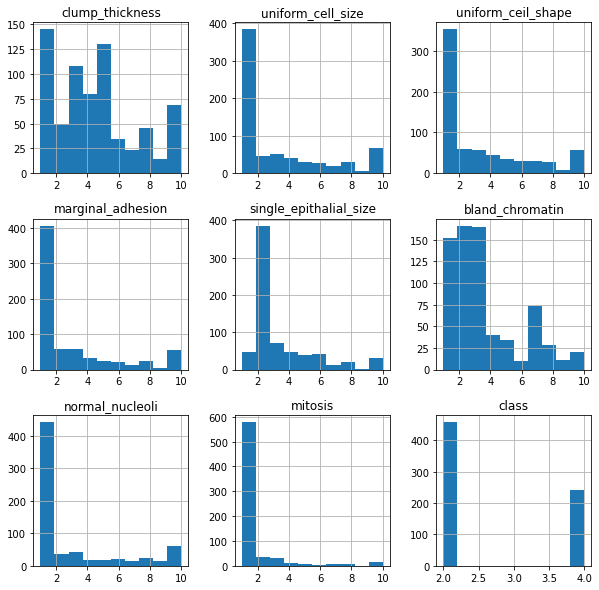

In [25]:
#Plot histograms for each variable
df.hist(figsize=(10,10))
plt.show()

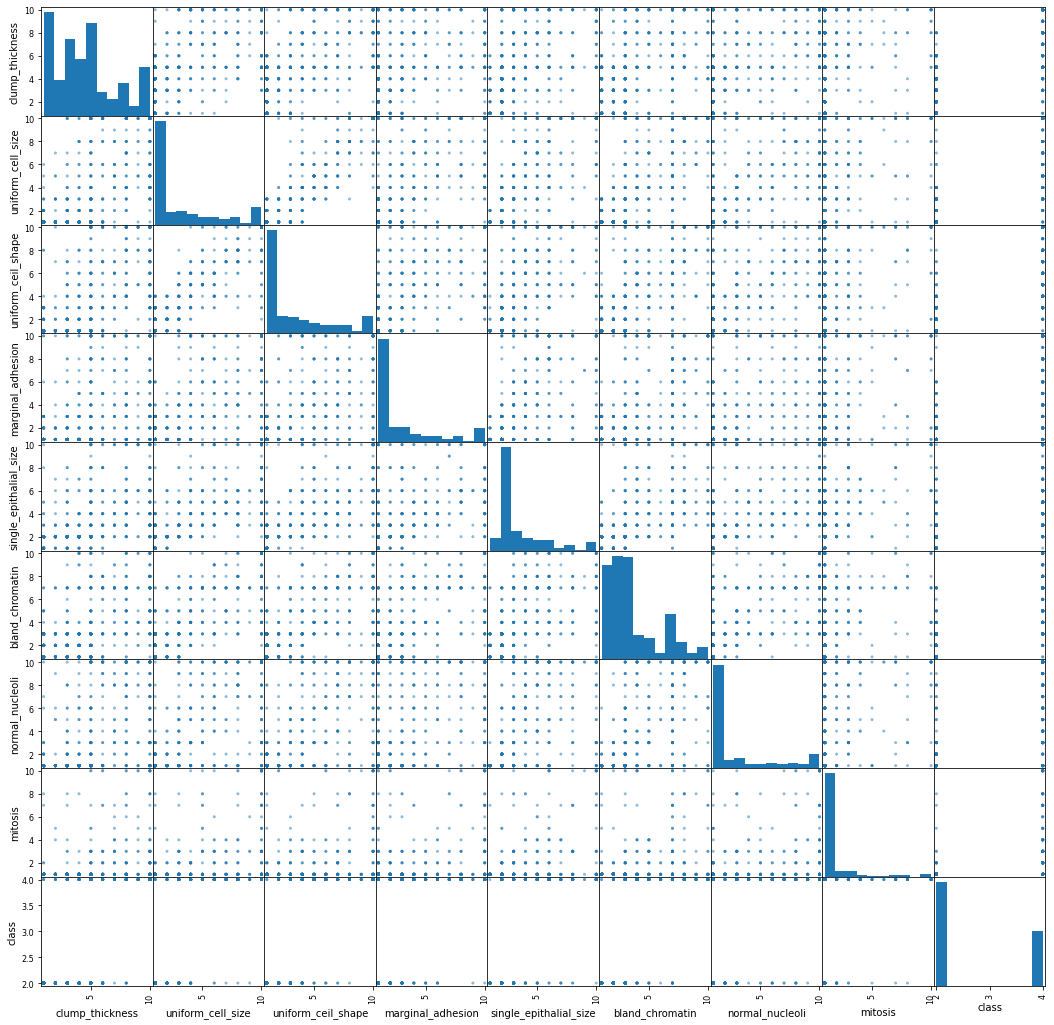

In [26]:
#Create scstter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()

In [31]:
#Create X amd y datasets for training
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)#We don't need to access this via cross_validate as we have imported this independently


In [32]:
#Specify testing options
seed=8
scoring='accuracy'

In [34]:
#Define the models to train
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

#Evaluate each model in turn
results=[]
names=[]

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

c:\users\hp pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\users\hp pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.973182 (0.014377)
SVM: 0.663766 (0.055342)


In [37]:
#Make predictions on validation dataset
for name,model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))
    

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        87
           4       0.96      0.96      0.96        53

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.6214285714285714
              precision    recall  f1-score   support

           2       0.62      1.00      0.77        87
           4       0.00      0.00      0.00        53

    accuracy                           0.62       140
   macro avg       0.31      0.50      0.38       140
weighted avg       0.39      0.62      0.48       140



c:\users\hp pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
clf=SVC()

clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

example=np.array([[4,2,1,1,1,2,3,2,10]])
example=example.reshape(len(example),-1)
prediction=clf.predict(example)
print(prediction)

0.6214285714285714
[2]
